# Titanic Kaggle Competition

This dataset contains data on the passengers of the Titanic, including whether or not they survived. The goal is to be able to predict whether a passenger survived from the data we have on them.

* Is this a supervised or unsupervised problem?
* Is this a classification or regression problem?

We're going to be focusing on the data exploration and preparation steps in this notebook. While this is a relatively simple dataset, it still has issues that need to be cleaned up and prepared to be used in a machine learning algorithm. We'll be doing the following:

* Explore the dataset to identify potential problems and patterns
* Deal with missing data points
* Identify categorical variables and convert them
* Manipulate certain features to get more information out of them

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
# Use pandas to read the csv into a DataFrame object
passengers = pd.read_csv('data/train.csv')
# Get stats on the dataset
print "\n--------First n rows---------\n"
print passengers.head()
print "\n--------Stats---------\n"
print passengers.describe()
print passengers.shape


--------First n rows---------

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

## Missing Values

Do you see how Age only has a count of 714 in the "describe()" output? See those "NaN" values in the "Age" and "Cabin" columns? That means we have missing data points. We need to something about that.

What is a good value to fill missing "Age" values? A good choice would be the median value of our "Age" column, since that falls right in the middle of all ages in our dataset.

What about the "Cabin" column? Since this isn't a numerical value we can't take its median. We'll come back to this column later in the notebook.

The "Embarked" column has NaN values as well, but due to a cool trick with handling categorical variables we won't need to fill it.

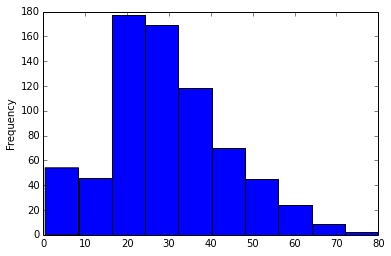

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

passengers["Age"].plot(kind='hist')

In [7]:
# pandas "fillna" lets us fill specified columns of the dataframe with a value of our choice
# http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html
passengers["Age"] = passengers["Age"].fillna(passengers["Age"].median())

# Notice how the "NaN" value from above is now 28, which is the median Age value
print passengers.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Categorical Data

Continuous numerical data is easy to work with, like "Fare" or "Age". However, what do we do with text data, or numerical data that represents a class or category, like Pclass? Let's assume "Name" and "Ticket" won't give us any meaningful insight as to whether the passenger survived. However, "Sex" and "Pclass" may be very important to whether the passenger survived. We need to convert those columns into values that machine learning algorithms can handle correctly.

We will represent multiple category categorical variables like Pclass into a "one-hot" vector representation where it is a vector of binary values (1 or 0) in which only one bit is set to 1. So for example, since we have 3 possible values for Pclass (1, 2, or 3), a value of 1 would be represented as (1, 0, 0). A value of 2 would be represented as (0, 1, 0), and so on.

Remember how the "Embarked" column has NaN values? Due to the fact that we're encoding its values as a "one-hot" vector we don't actually need to fill them. The one-hot representation of "Embarked" has 3 possible values (C, S, Q) where the value is the column that has a 1. However, when the value of "Embarked" is NaN, none of those values will be 1, so the vector will be (0, 0, 0), which is uniquely identifiable. Cool trick, huh?

It's worth mentioning here that we could also handle categorical values by simpling assigning an integer label to each possible value - this is known as Label Encoding, as opposed to the One-Hot Encoding we're using. It's worth trying out both encoding types on your data and seeing which one performs better. I included code for label encoding as well but kept it commented out so it doesn't get confusing.

In [8]:
# def label_encode_column(df, col):
#     col_vals = df[col].unique()
#     print col_vals
#     col_map = {col_vals[i]:i for i in range(len(col_vals))}
#     return df.apply(lambda row: col_map[row[col]], axis=1)

# Drop "Name", "Ticket" and "PassengerId" columns
passengers = passengers.drop(["Name","Ticket","PassengerId"], axis=1)
print "----------No Name or Ticket-----------\n"
print passengers.head()

# # Make copy for label encoding
# passengers_label = passengers.copy()
# passengers_label["Embarked"] = label_encode_column(passengers_label, "Embarked")
# passengers_label["Pclass"] = label_encode_column(passengers_label, "Pclass")

# pandas "get_dummies" function let's us convert categorical columns to "one-hot" vector data
# that machine learning algorithms like
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
passengers = pd.get_dummies(passengers, columns=["Embarked","Pclass"])

# Since "Sex" is a binary variable (only 2 possible values),
# we can simply assign numerical labels of 0 and 1 to "male" and "female"
passengers["Sex"][passengers["Sex"] == 'male'] = 0
passengers["Sex"][passengers["Sex"] == 'female'] = 1

print "\n----------Categorical Data-----------\n"
print passengers.head()


# # Label Encoding Version
# passengers_label["Sex"] = passengers["Sex"]

----------No Name or Ticket-----------

   Survived  Pclass     Sex  Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male   22      1      0   7.2500   NaN        S
1         1       1  female   38      1      0  71.2833   C85        C
2         1       3  female   26      0      0   7.9250   NaN        S
3         1       1  female   35      1      0  53.1000  C123        S
4         0       3    male   35      0      0   8.0500   NaN        S

----------Categorical Data-----------

   Survived Sex  Age  SibSp  Parch     Fare Cabin  Embarked_C  Embarked_Q  \
0         0   0   22      1      0   7.2500   NaN           0           0   
1         1   1   38      1      0  71.2833   C85           1           0   
2         1   1   26      0      0   7.9250   NaN           0           0   
3         1   1   35      1      0  53.1000  C123           0           0   
4         0   0   35      0      0   8.0500   NaN           0           0   

   Embarked_S  Pclass_1  Pclass

/Library/Python/2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## That Pesky Cabin Column

You may be wondering, why didn't we just throw out the "Cabin" column like we did with "Name" and "Ticket"? Let's think about what the Cabin value means about our passenger. Each Cabin value has a letter, representing the deck, and a room number. How could these values help us? Check out this ship plan of the Titanic:

http://home.online.nl/john.vanderree/plan.htm#Decke

You can see that higher deck letters are further belowdecks. Consider that the Titanic struck the iceberg at night, meaning that many passengers were likely in their rooms at the time of the crash. That being the case, the deck letter could be significant because the higher the deck letter the further belowdecks the passengers were at the time of the crash (assuming they were in their rooms). This could have affected how quickly they got to the lifeboats and therefore their survival chances. While the room number could have some effect on how quickly they could get to lifeboats, it is probably not as significant as the deck letter, so we'll ignore it.

One big caveat here is that the deck letter is probably highly correlated with the passenger class. We won't go into it in-depth here, but know that if one of your features is correlated with another, it's not going to add much extra information and may even hurt your predictions. We're going to ignore the possible correlation here for the sake of learning how to manipulate our columns into new features, but keep that in mind. Another caveat is that most of the cabin values are missing, meaning that we may not get much signal out of it.

Let's parse out the deck letter from each "Cabin" value and encode the column to a one-hot vector. As with "Embarked" above, we don't need to fill the NaN values due to the cool aspect of one-hot encoding.

In [9]:
# function for extracting deck letter
def get_deck_letter(row):
    # Ignore NaN values
    if not pd.isnull(row["Cabin"]):
        # Get first letter of "Cabin" value
        return str(row["Cabin"])[0]
    # Otherwise return NaN
    return row["Cabin"]

# # Label Version
# passengers_label["Cabin"] = passengers_label.apply(lambda row: get_deck_letter(row), axis=1)
# passengers_label["Cabin"] = label_encode_column(passengers_label, "Cabin")

# set cabin values to deck letter
passengers["Cabin"] = passengers.apply(lambda row: get_deck_letter(row), axis=1)
print "--------Filled Cabin-----------\n"
print passengers.head()
print "\n\n"

passengers = pd.get_dummies(passengers, columns=["Cabin"])
print "--------Categorical Cabin-----------\n"
print passengers.head()

--------Filled Cabin-----------

   Survived Sex  Age  SibSp  Parch     Fare Cabin  Embarked_C  Embarked_Q  \
0         0   0   22      1      0   7.2500   NaN           0           0   
1         1   1   38      1      0  71.2833     C           1           0   
2         1   1   26      0      0   7.9250   NaN           0           0   
3         1   1   35      1      0  53.1000     C           0           0   
4         0   0   35      0      0   8.0500   NaN           0           0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           1         0         0         1  
1           0         1         0         0  
2           1         0         0         1  
3           1         1         0         0  
4           1         0         0         1  



--------Categorical Cabin-----------

   Survived Sex  Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0   0   22      1      0   7.2500           0           0   
1         1   1   38      1      0  71.2833  

## More Intuition

It seems likely that the first to be saved on the Titanic would be women and children. We already have a binary variable for whether the passenger was a woman, so let's create a variable that says whether the passenger is a child.

Let's then see how accurate our predictions would be if we based it on just one column, like "Sex" or "IsChild".

In [ ]:
# Function for determining if passenger is a child
def is_child(row):
    child = 0 if row["Age"] >= 12 else 1
    return child

passengers["IsChild"] = passengers.apply(lambda row: is_child(row), axis=1)
passengers = passengers.drop("Age", axis=1)

# # Label encoding version
# passengers_label["IsChild"] = passengers["IsChild"]

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

def predict_by_column(df, col, col_val, target_col):
    """
    df: dataframe to make predictions on
    col: predict target based on this column being equal to `col_val`
    col_val: value of col
    target_col: column you are trying to predict
    """
    y = df[target_col].values
    x = df[col].values
    predictions = []
    num_correct = 0
    for i in range(len(y)):
        pred = 1 if x[i] == col_val else 0
        predictions.append(pred)
        actual = y[i]
        if pred == actual:
            num_correct += 1
    acc = num_correct / float(len(y))
    cm = confusion_matrix(np.array(predictions).astype(int), y)
    return acc, cm

def get_best_columns(df, n, target_col):
    accuracies = []
    for c in df.columns:
        if c != target_col and len(df[c].unique()) == 2 and 1 in df[c].unique():
            acc, cm = predict_by_column(df, c, 1, target_col)
            accuracies.append((c, {"Acc":acc, "CM": cm}))
    return sorted(accuracies, key=lambda x: x[1]['Acc'], reverse=True)[:n]
    
best_cols = get_best_columns(passengers, 5, "Survived")
for c in best_cols:
    print c[0] + ":"
    print "\tAcc: " + str(c[1]["Acc"])
    print "\tConfusion Matrix:"
    print "\t"+str(c[1]["CM"][0])
    print "\t"+str(c[1]["CM"][1])
    print ""

Sex:
	Acc: 0.786756453423
	Confusion Matrix:
	[468 109]
	[ 81 233]

Pclass_1:
	Acc: 0.679012345679
	Confusion Matrix:
	[469 206]
	[ 80 136]

Cabin_B:
	Acc: 0.641975308642
	Confusion Matrix:
	[537 307]
	[12 35]

Embarked_C:
	Acc: 0.636363636364
	Confusion Matrix:
	[474 249]
	[75 93]

Cabin_D:
	Acc: 0.635241301908
	Confusion Matrix:
	[541 317]
	[ 8 25]



## Machine Learning

Now that we've cleaned up our data, let's get it ready to put into a machine learning model. We need to do a few things:

* Extract the "Survived" column to be our prediction labels
* Split our dataset into a training set and a testing set
* Train a machine learning model on the training set
* Test the trained model on our test set and evaluate its performance

We split our dataset into a training set and a test set so we can have a way to evaluate how well our model will do on data it hasn't trained on. We know the answers to the test set, but the model doesn't, so we can assess its accuracy.

Let's start with the first two.

### Split the Dataset

In [12]:
from sklearn import cross_validation
# Get feature matrix and label vector
X = passengers.drop("Survived", axis=1).values
y = passengers["Survived"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=42)

### Train the Model

We're going to use a Random Forest as our machine learning model. Don't worry about the details of the algorithm, we'll cover that in a later meetup.

0.798206278027
[[115  19]
 [ 26  63]]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


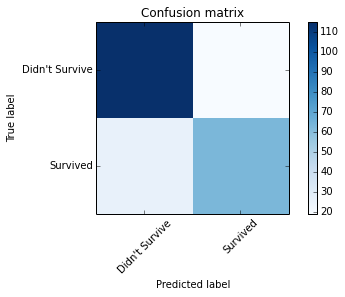

In [13]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

target_names = ["Didn't Survive", "Survived"]

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)
# scores = cross_validation.cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print scores
cm = confusion_matrix(y_test, y_pred)
print cm
plot_confusion_matrix(cm)

LinearSVC

0.80269058296
[[112  22]
 [ 22  67]]


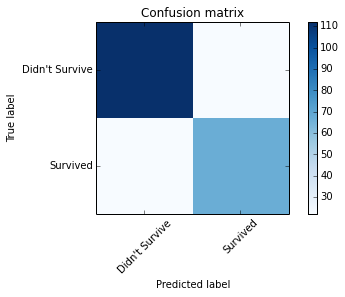

	-0.6197	Cabin_G        		1.1702	Cabin_E        
	-0.2113	Pclass_3       		0.9305	Sex            
	-0.1885	Embarked_S     		0.6740	Cabin_D        
	-0.0998	SibSp          		0.3370	Cabin_C        
	-0.0584	Cabin_T        		0.3200	Cabin_F        



MultinomialNB

0.717488789238
[[114  20]
 [ 43  46]]


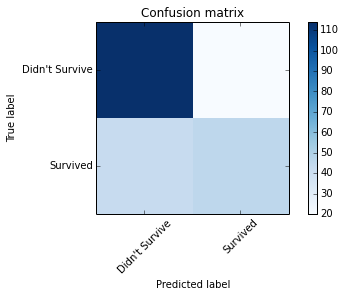

	-9.9293	Cabin_T        		-0.5068	Fare           
	-9.2361	Cabin_G        		-1.0567	Age            
	-8.3198	Cabin_A        		-4.7876	Sex            
	-7.8498	Cabin_F        		-4.8173	Embarked_S     
	-7.2212	Cabin_D        		-5.1010	SibSp          



SGDClassifier

0.300448430493
[[44 90]
 [66 23]]


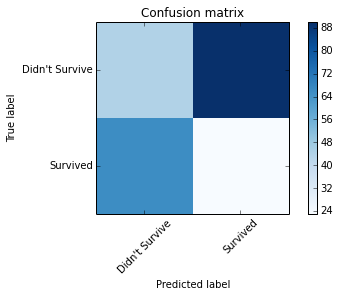

	-725.9737	SibSp          		686.7942	Sex            
	-297.6183	Fare           		171.5142	Age            
	-251.2100	Pclass_3       		159.0228	Pclass_2       
	-207.4211	Parch          		82.9684	Cabin_E        
	-129.0620	Embarked_S     		78.3591	Embarked_C     



AdaBoostClassifier

0.80269058296
[[112  22]
 [ 22  67]]


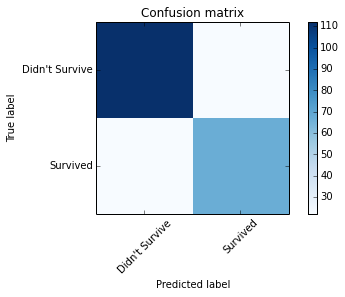




Perceptron

0.600896860987
[[134   0]
 [ 89   0]]


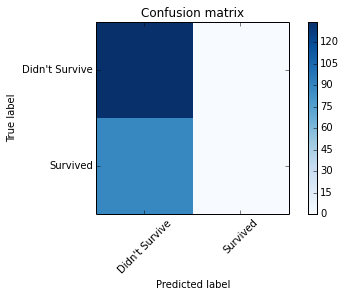

	-299.0000	SibSp          		301.0000	Sex            
	-106.7243	Fare           		44.0000	Pclass_2       
	-94.0000	Parch          		31.0000	Cabin_E        
	-90.0000	Pclass_3       		29.0000	Embarked_C     
	-69.0000	Embarked_S     		21.0000	Cabin_B        



PassiveAggressiveClassifier

0.421524663677
[[  5 129]
 [  0  89]]


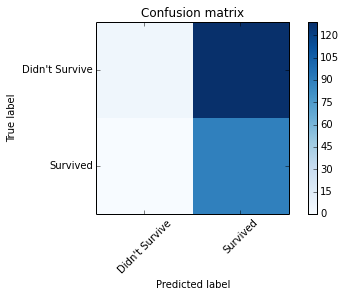

	-0.1683	SibSp          		0.5093	Sex            
	-0.1108	Embarked_S     		0.1403	Pclass_2       
	-0.0759	Pclass_3       		0.1349	Embarked_C     
	-0.0457	Cabin_G        		0.1274	Parch          
	-0.0024	Cabin_A        		0.0919	Cabin_E        



KNeighborsClassifier

0.695067264574
[[104  30]
 [ 38  51]]


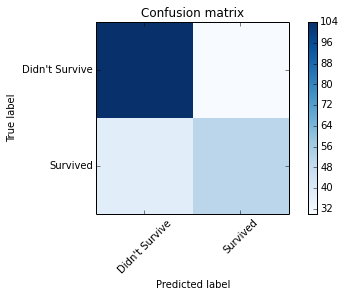




RandomForestClassifier

0.820627802691
[[117  17]
 [ 23  66]]


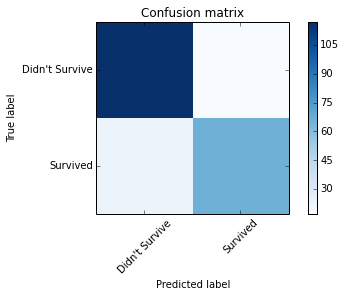

In [15]:
from sklearn.utils.extmath import density

def show_most_informative_features(feature_names, clf, n=20):
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)

classifiers = [
    LinearSVC(),
    MultinomialNB(),
    SGDClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier()
]

feature_names = passengers.drop("Survived", axis=1).columns

for clf in classifiers:
    print clf.__class__.__name__
    print ""
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    print cm
    plot_confusion_matrix(cm)


    died_words = []
    survived_words = []
    
    if hasattr(clf, 'coef_'):
        show_most_informative_features(feature_names, clf, 5)
    
    print "\n\n"

In [ ]:
import os, sys
XGB_ROOT = "/Users/adamrogers/xgboost/"
xgb_path = os.path.join(XGB_ROOT, "python-package")
if xgb_path not in sys.path:
    sys.path.insert(0, xgb_path)
import xgboost as xgb

xgmat = xgb.DMatrix( X_train, label=y_train )#, weight=weight )

# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'binary:logitraw'
# scale weight of positive examples
#param['scale_pos_weight'] = sum_wneg/sum_wpos
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc'
param['silent'] = 1
param['nthread'] = 16

# you can directly throw param in, though we want to watch multiple metrics here
plst = list(param.items())#+[('eval_metric', 'ams@0.15')]

watchlist = [ (xgmat,'train') ]
# boost 120 tres
num_round = 120
print ('loading data end, start to boost trees')
bst = xgb.train( plst, xgmat, num_round, watchlist );

In [ ]:
dtest = xgb.DMatrix(X_test)
ypred = bst.predict(dtest)
print np.rint(ypred)
xgb.plot_importance(bst)
print feature_names
xgb.plot_tree(bst, num_trees=2)